# Data Visualization for VRDK

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

## Controller Data

In [2]:
controller_data = pd.read_csv("test123_ControllerPointData.csv")

In [3]:
controller_data

,ID,ObjectName,LeftControlPoint,RightControlPoint,PrimaryIndexTrigger,PrimaryHandTrigger,SecondaryIndexTrigger,SecondaryHandTrigger,IsMarked,InterInit,InterEnd,ObjXInit,ObjXEnd,ObjYInit,ObjYEnd,ObjZInit,ObjZEnd
0,test123,Capsule,0,1,0,0,0,0,0,10.23256,12.60707,2.700000,2.700000,1.500000,1.500000,2.700000,2.700000
1,test123,Capsule,0,1,0,0,0,0,0,13.92141,15.14761,2.700000,2.700000,1.500000,1.500000,2.700000,2.700000
2,test123,Floor,0,1,0,0,0,0,0,15.61965,16.31791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,test123,Floor,0,1,0,0,0,0,0,16.81487,17.19181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,test123,Sphere,0,1,0,0,0,0,0,17.76369,18.91299,-2.700000,-2.700000,1.500000,1.500000,2.700000,2.700000
5,test123,Sphere,0,0,0,0,0,1,0,22.44798,26.83541,-2.700000,-2.623074,1.500000,1.535466,2.700000,2.785929
6,test123,Sphere,0,0,0,1,0,0,0,28.49348,30.68064,-2.623074,-2.671928,1.535466,1.451596,2.785929,2.733284
7,test123,Sphere,1,0,0,0,0,0,0,31.32329,32.96863,-2.671928,-2.671928,1.451596,1.451596,2.733284,2.733284
8,test123,Floor,1,0,0,0,0,0,0,33.52330,34.56632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,test123,Floor,1,0,0,0,0,0,0,34.79408,34.87325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Global Variables

In [4]:
ID = controller_data["ID"]
objects = controller_data["ObjectName"]
inter_init = controller_data["InterInit"]
inter_end = controller_data["InterEnd"]

## ----------------------------------------------------------------------------------------------------------------------------------

## Point Data

### Left Controller Point

#### Left Controller Point Dictionary

In [5]:
left_controller_point_data = controller_data["LeftControlPoint"]

# These variables are for Box Plots
total_length_of_time = {}
total_count = {}
average_look_time = {}
longest_look_time = {}

# These variables are for Box Plots
all_look_times = {}

for i in range(0, len(left_controller_point_data)):
    if left_controller_point_data[i] == 1:
        obj = objects[i]
        obj_interaction_time = inter_end[i] - inter_init[i]
        
        # Fill out the all_look_times with all look times
        if obj in all_look_times.keys():
            all_look_times[obj].append(obj_interaction_time)
        else:
            all_look_times_list = [obj_interaction_time]
            all_look_times[obj] = all_look_times_list
        
        # Fill out the total_length_of_time dictionary
        if obj in total_length_of_time.keys():
            total_length_of_time[obj] += obj_interaction_time
        else:
            total_length_of_time[obj] = obj_interaction_time
            
        # Fill out the total_count dictionary
        if obj in total_count.keys():
            total_count[obj] += 1
        else:
            total_count[obj] = 1
            
        # Maybe update the longest_look_time
        if obj in longest_look_time.keys():
            if longest_look_time[obj] < obj_interaction_time:
                longest_look_time[obj] = obj_interaction_time
        else:
            longest_look_time[obj] = obj_interaction_time
            
for obj_key in total_length_of_time.keys():
    average_look_time[obj_key] = total_length_of_time[obj_key] / total_count[obj_key]
    
# Debugging
print(all_look_times)
print(total_length_of_time)
print(total_count)
print(average_look_time)
print(longest_look_time)

{'Sphere': [1.6453399999999938], 'Floor': [1.0430200000000056, 0.07916999999999774, 2.1374899999999926, 0.9306699999999992, 0.44228999999999985, 0.4613999999999976], 'Capsule': [1.3551099999999963], 'Cube': [0.931200000000004, 0.401449999999997], 'Cylinder': [0.7068400000000139]}
{'Sphere': 1.6453399999999938, 'Floor': 5.094039999999993, 'Capsule': 1.3551099999999963, 'Cube': 1.332650000000001, 'Cylinder': 0.7068400000000139}
{'Sphere': 1, 'Floor': 6, 'Capsule': 1, 'Cube': 2, 'Cylinder': 1}
{'Sphere': 1.6453399999999938, 'Floor': 0.8490066666666655, 'Capsule': 1.3551099999999963, 'Cube': 0.6663250000000005, 'Cylinder': 0.7068400000000139}
{'Sphere': 1.6453399999999938, 'Floor': 2.1374899999999926, 'Capsule': 1.3551099999999963, 'Cube': 0.931200000000004, 'Cylinder': 0.7068400000000139}


#### Left Controller Point Bar Graphs

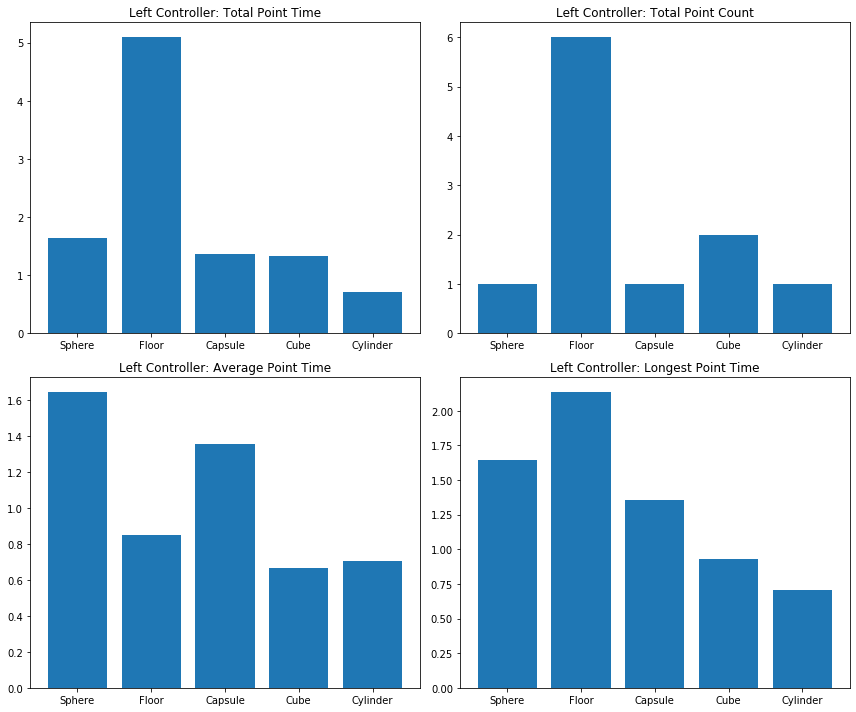

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0
num_plots = 4

label = total_count.keys()
indices = range(0, len(label))

for i in range(0, num_plots):
    if i == 0:
        data = total_length_of_time.values()
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_title("Left Controller: Total Point Time")
        
    elif i == 1:
        data = total_count.values()
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_title("Left Controller: Total Point Count")
        
    elif i == 2:
        data = average_look_time.values()
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_title("Left Controller: Average Point Time")
        
    else:
        data = longest_look_time.values()
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_title("Left Controller: Longest Point Time")

fig.tight_layout()

#### Left Controller Point Box Plot

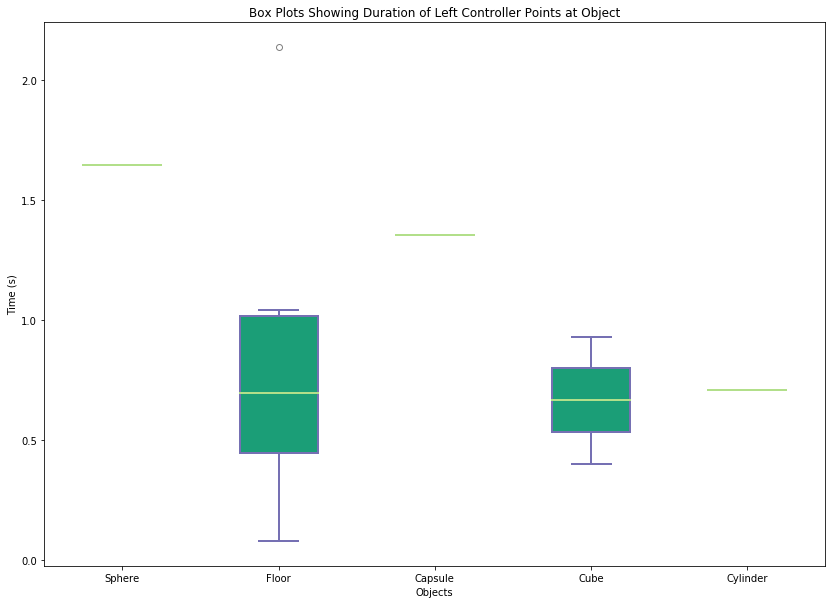

In [7]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Left Controller Points at Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

### Right Controller Point

#### Right Controller Point Dictionaries

In [8]:
right_controller_point_data = controller_data["RightControlPoint"]

# These variables are for Bar Graphs
total_length_of_time = {}
total_count = {}
average_look_time = {}
longest_look_time = {}

# These variables are for Box Plots
all_look_times = {}

for i in range(0, len(right_controller_point_data)):
    if right_controller_point_data[i] == 1:
        obj = objects[i]
        obj_interaction_time = inter_end[i] - inter_init[i]
        
        # Fill out the all_look_times with all look times
        if obj in all_look_times.keys():
            all_look_times[obj].append(obj_interaction_time)
        else:
            all_look_times_list = [obj_interaction_time]
            all_look_times[obj] = all_look_times_list
        
        # Fill out the total_length_of_time dictionary
        if obj in total_length_of_time.keys():
            total_length_of_time[obj] += obj_interaction_time
        else:
            total_length_of_time[obj] = obj_interaction_time
            
        # Fill out the total_count dictionary
        if obj in total_count.keys():
            total_count[obj] += 1
        else:# Left Controller
            total_count[obj] = 1
            
        # Maybe update the longest_look_time
        if obj in longest_look_time.keys():
            if longest_look_time[obj] < obj_interaction_time:
                longest_look_time[obj] = obj_interaction_time
        else:
            longest_look_time[obj] = obj_interaction_time
            
for obj_key in total_length_of_time.keys():
    average_look_time[obj_key] = total_length_of_time[obj_key] / total_count[obj_key]
    
# Debugging
print(obj_interaction_time)
print(total_length_of_time)
print(total_count)
print(average_look_time)
print(longest_look_time)

0.687979999999996
{'Capsule': 3.6007099999999994, 'Floor': 3.497680000000006, 'Sphere': 1.1493000000000002, 'Cube': 2.3459199999999854, 'Cylinder': 0.687979999999996}
{'Capsule': 2, 'Floor': 8, 'Sphere': 1, 'Cube': 6, 'Cylinder': 1}
{'Capsule': 1.8003549999999997, 'Floor': 0.43721000000000076, 'Sphere': 1.1493000000000002, 'Cube': 0.3909866666666642, 'Cylinder': 0.687979999999996}
{'Capsule': 2.374509999999999, 'Floor': 0.6982600000000012, 'Sphere': 1.1493000000000002, 'Cube': 1.215289999999996, 'Cylinder': 0.687979999999996}


#### Right Controller Point Bar Graphs

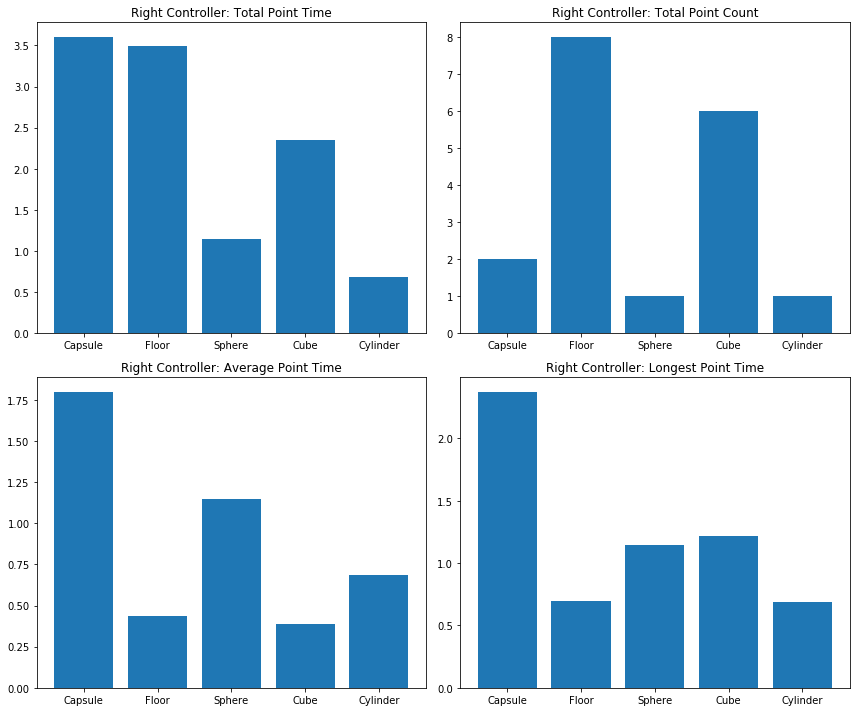

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0
num_plots = 4

label = total_count.keys()
indices = range(0, len(label))

for i in range(0, num_plots):
    if i == 0:
        data = total_length_of_time.values()
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_title("Right Controller: Total Point Time")
        
    elif i == 1:
        data = total_count.values()
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_title("Right Controller: Total Point Count")
        
    elif i == 2:
        data = average_look_time.values()
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_title("Right Controller: Average Point Time")
        
    else:
        data = longest_look_time.values()
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_title("Right Controller: Longest Point Time")

fig.tight_layout()

# Display box plot

#### Right Controller Point Box Plots

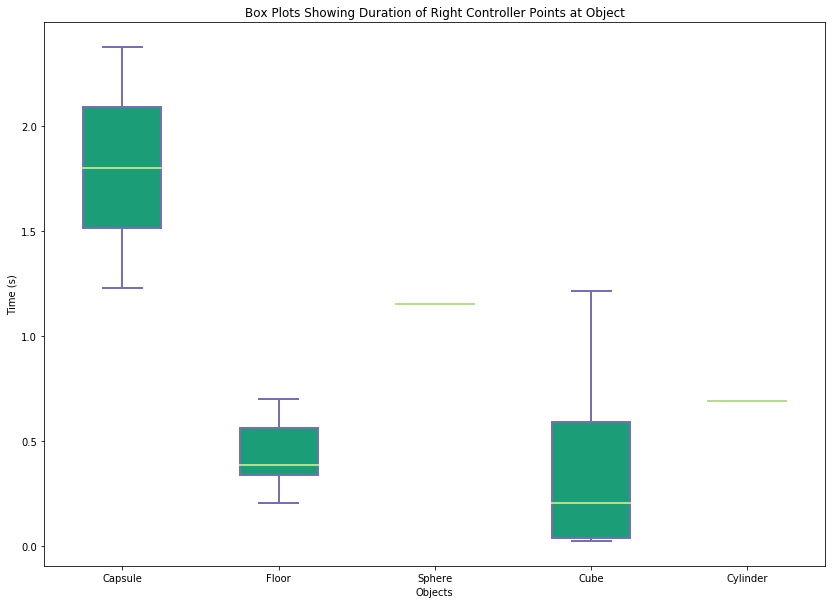

In [10]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Right Controller Points at Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

### Both Controllers Point

#### Both Controllers Point Dictionaries

In [11]:
# Both Controllers
left_controller_point_data = controller_data["LeftControlPoint"]
right_controller_point_data = controller_data["RightControlPoint"]

# These variables are for Bar Graphs
total_length_of_time = {}
total_count = {}
average_look_time = {}
longest_look_time = {}

# These variables are for Box Plots
all_look_times = {}

for i in range(0, len(left_controller_point_data)):
    if left_controller_point_data[i] == 1 or right_controller_point_data[i] == 1:
        obj = objects[i]
        obj_interaction_time = inter_end[i] - inter_init[i]
        
        # Fill out the all_look_times with all look times
        if obj in all_look_times.keys():
            all_look_times[obj].append(obj_interaction_time)
        else:
            all_look_times_list = [obj_interaction_time]
            all_look_times[obj] = all_look_times_list
        
        # Fill out the total_length_of_time dictionary
        if obj in total_length_of_time.keys():
            total_length_of_time[obj] += obj_interaction_time
        else:
            total_length_of_time[obj] = obj_interaction_time
            
        # Fill out the total_count dictionary
        if obj in total_count.keys():
            total_count[obj] += 1
        else:
            total_count[obj] = 1
            
        # Maybe update the longest_look_time
        if obj in longest_look_time.keys():
            if longest_look_time[obj] < obj_interaction_time:
                longest_look_time[obj] = obj_interaction_time
        else:
            longest_look_time[obj] = obj_interaction_time
            
for obj_key in total_length_of_time.keys():
    average_look_time[obj_key] = total_length_of_time[obj_key] / total_count[obj_key]
    
# Debugging
print(all_look_times)
print(total_length_of_time)
print(total_count)
print(average_look_time)
print(longest_look_time)

{'Capsule': [2.374509999999999, 1.2262000000000004, 1.3551099999999963], 'Floor': [0.6982600000000012, 0.3769399999999976, 1.0430200000000056, 0.07916999999999774, 2.1374899999999926, 0.9306699999999992, 0.5325900000000061, 0.20423999999999864, 0.3547000000000011, 0.2846900000000048, 0.44228999999999985, 0.6519100000000009, 0.39434999999999576, 0.4613999999999976], 'Sphere': [1.1493000000000002, 1.6453399999999938], 'Cube': [0.931200000000004, 1.215289999999996, 0.02489999999999526, 0.6705199999999962, 0.07179000000000002, 0.3403599999999969, 0.02306000000000097, 0.401449999999997], 'Cylinder': [0.7068400000000139, 0.687979999999996]}
{'Capsule': 4.955819999999996, 'Floor': 8.591719999999999, 'Sphere': 2.794639999999994, 'Cube': 3.6785699999999864, 'Cylinder': 1.39482000000001}
{'Capsule': 3, 'Floor': 14, 'Sphere': 2, 'Cube': 8, 'Cylinder': 2}
{'Capsule': 1.6519399999999986, 'Floor': 0.6136942857142856, 'Sphere': 1.397319999999997, 'Cube': 0.4598212499999983, 'Cylinder': 0.697410000000

#### Both Controllers Point Bar Graphs

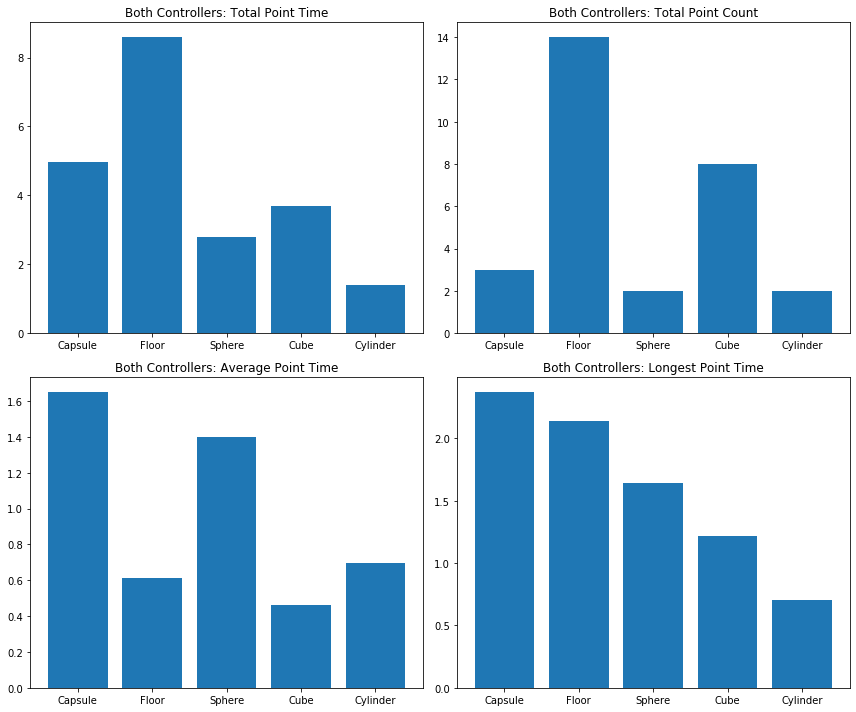

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0
num_plots = 4

label = total_count.keys()
indices = range(0, len(label))

for i in range(0, num_plots):
    if i == 0:
        data = total_length_of_time.values()
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_title("Both Controllers: Total Point Time")
        
    elif i == 1:
        data = total_count.values()
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_title("Both Controllers: Total Point Count")
        
    elif i == 2:
        data = average_look_time.values()
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_title("Both Controllers: Average Point Time")
        
    else:
        data = longest_look_time.values()
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_title("Both Controllers: Longest Point Time")

fig.tight_layout()

# Display box plot

#### Both Controllers Point Box Plot

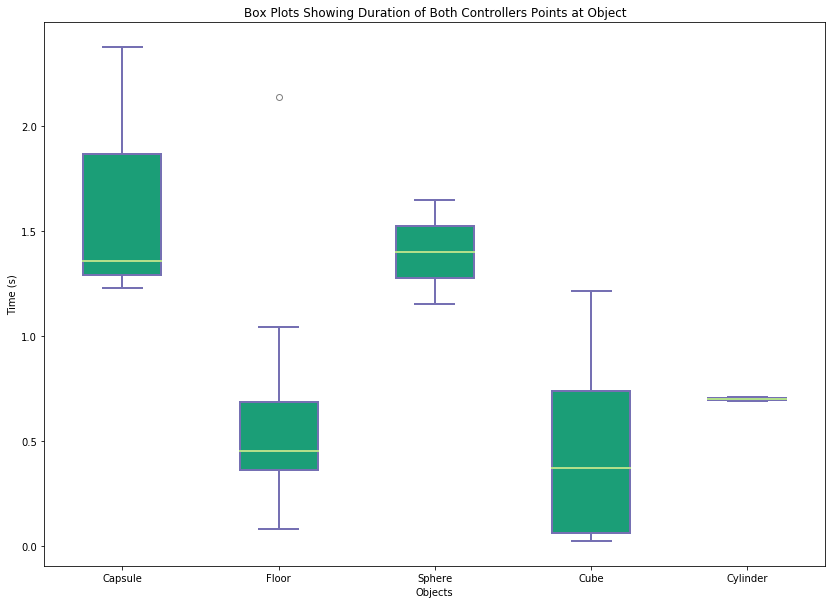

In [13]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Both Controllers Points at Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

## ----------------------------------------------------------------------------------------------------------------------------------

## Grab Data

### Left Controller Grab

#### Left Controller Grab Dictionaries

In [14]:
left_controller_grab_data = controller_data["PrimaryHandTrigger"]

# These variables are for Bar Graphs
total_length_of_time = {}
total_count = {}
average_look_time = {}
longest_look_time = {}

# These variables are for Box Plots
all_look_times = {}

for i in range(0, len(left_controller_point_data)):
    if left_controller_grab_data[i] == 1:
        obj = objects[i]
        obj_interaction_time = inter_end[i] - inter_init[i]
        
        # Fill out the all_look_times with all look times
        if obj in all_look_times.keys():
            all_look_times[obj].append(obj_interaction_time)
        else:
            all_look_times_list = [obj_interaction_time]
            all_look_times[obj] = all_look_times_list
        
        # Fill out the total_length_of_time dictionary
        if obj in total_length_of_time.keys():
            total_length_of_time[obj] += obj_interaction_time
        else:
            total_length_of_time[obj] = obj_interaction_time
            
        # Fill out the total_count dictionary
        if obj in total_count.keys():
            total_count[obj] += 1
        else:
            total_count[obj] = 1
            
        # Maybe update the longest_look_time
        if obj in longest_look_time.keys():
            if longest_look_time[obj] < obj_interaction_time:
                longest_look_time[obj] = obj_interaction_time
        else:
            longest_look_time[obj] = obj_interaction_time
            
for obj_key in total_length_of_time.keys():
    average_look_time[obj_key] = total_length_of_time[obj_key] / total_count[obj_key]
    
# Debugging
print(all_look_times)
print(total_length_of_time)
print(total_count)
print(average_look_time)
print(longest_look_time)

{'Sphere': [2.1871600000000058], 'Cube': [1.3419299999999978, 2.3531399999999962, 0.7894800000000046, 2.090570000000014]}
{'Sphere': 2.1871600000000058, 'Cube': 6.5751200000000125}
{'Sphere': 1, 'Cube': 4}
{'Sphere': 2.1871600000000058, 'Cube': 1.6437800000000031}
{'Sphere': 2.1871600000000058, 'Cube': 2.3531399999999962}


#### Left Controller Grab Bar Graphs

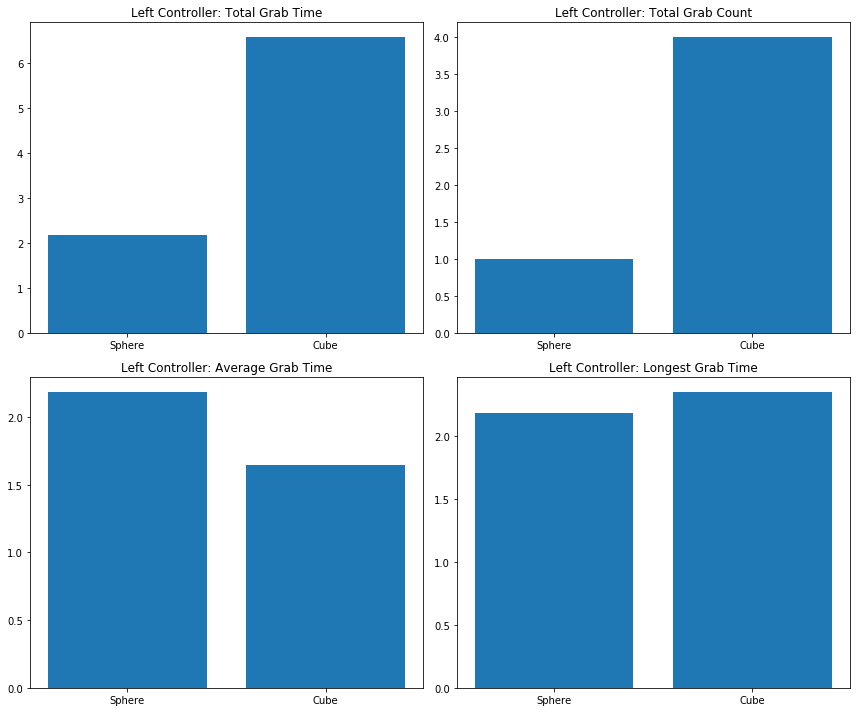

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0
num_plots = 4

label = total_count.keys()
indices = range(0, len(label))

for i in range(0, num_plots):
    if i == 0:
        data = total_length_of_time.values()
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_title("Left Controller: Total Grab Time")
        
    elif i == 1:
        data = total_count.values()
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_title("Left Controller: Total Grab Count")
        
    elif i == 2:
        data = average_look_time.values()
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_title("Left Controller: Average Grab Time")
        
    else:
        data = longest_look_time.values()
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_title("Left Controller: Longest Grab Time")

fig.tight_layout()

# Display box plot

#### Left Controller Grab Box Plots

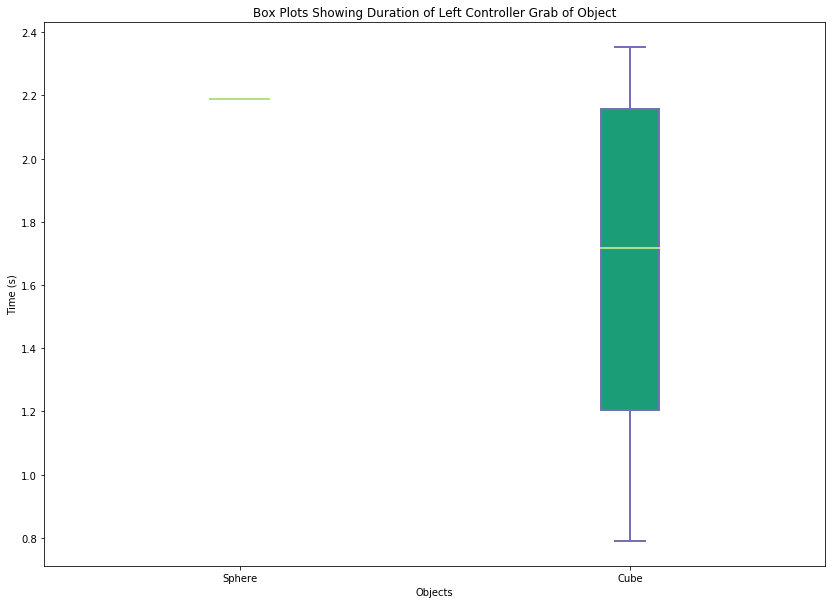

In [16]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Left Controller Grab of Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

### Right Controller Grab

#### Right Controller Grab Dictionaries

In [17]:
right_controller_grab_data = controller_data["SecondaryHandTrigger"]

# These variables are for Bar Graphs
total_length_of_time = {}
total_count = {}
average_look_time = {}
longest_look_time = {}

# These variables are for Box Plots
all_look_times = {}

for i in range(0, len(right_controller_grab_data)):
    if right_controller_grab_data[i] == 1:
        obj = objects[i]
        obj_interaction_time = inter_end[i] - inter_init[i]
        
        # Fill out the all_look_times with all look times
        if obj in all_look_times.keys():
            all_look_times[obj].append(obj_interaction_time)
        else:
            all_look_times_list = [obj_interaction_time]
            all_look_times[obj] = all_look_times_list
        
        # Fill out the total_length_of_time dictionary
        if obj in total_length_of_time.keys():
            total_length_of_time[obj] += obj_interaction_time
        else:
            total_length_of_time[obj] = obj_interaction_time
            
        # Fill out the total_count dictionary
        if obj in total_count.keys():
            total_count[obj] += 1
        else:
            total_count[obj] = 1
            
        # Maybe update the longest_look_time
        if obj in longest_look_time.keys():
            if longest_look_time[obj] < obj_interaction_time:
                longest_look_time[obj] = obj_interaction_time
        else:
            longest_look_time[obj] = obj_interaction_time
            
for obj_key in total_length_of_time.keys():
    average_look_time[obj_key] = total_length_of_time[obj_key] / total_count[obj_key]
    
# Debugging
print(all_look_times)
print(total_length_of_time)
print(total_count)
print(average_look_time)
print(longest_look_time)

{'Sphere': [4.387429999999998], 'Cube': [1.29589, 3.226529999999997, 1.442530000000005, 1.5885999999999996]}
{'Sphere': 4.387429999999998, 'Cube': 7.553550000000001}
{'Sphere': 1, 'Cube': 4}
{'Sphere': 4.387429999999998, 'Cube': 1.8883875000000003}
{'Sphere': 4.387429999999998, 'Cube': 3.226529999999997}


#### Right Controller Grab Bar Graphs

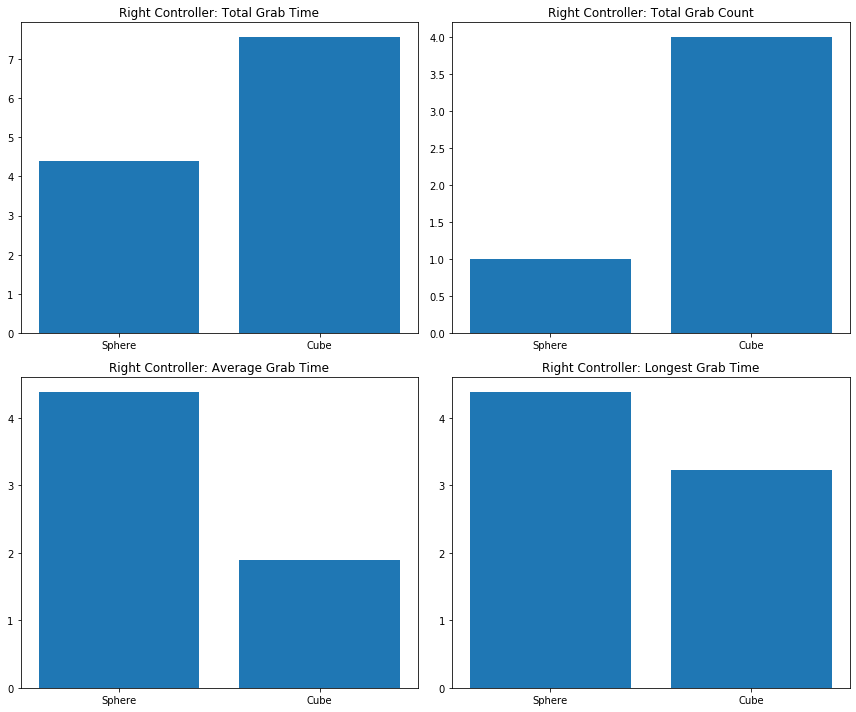

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0
num_plots = 4

label = total_count.keys()
indices = range(0, len(label))

for i in range(0, num_plots):
    if i == 0:
        data = total_length_of_time.values()
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_title("Right Controller: Total Grab Time")
        
    elif i == 1:
        data = total_count.values()
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_title("Right Controller: Total Grab Count")
        
    elif i == 2:
        data = average_look_time.values()
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_title("Right Controller: Average Grab Time")
        
    else:
        data = longest_look_time.values()
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_title("Right Controller: Longest Grab Time")

fig.tight_layout()

# Display box plot

#### Right Controller Grab Box Plots

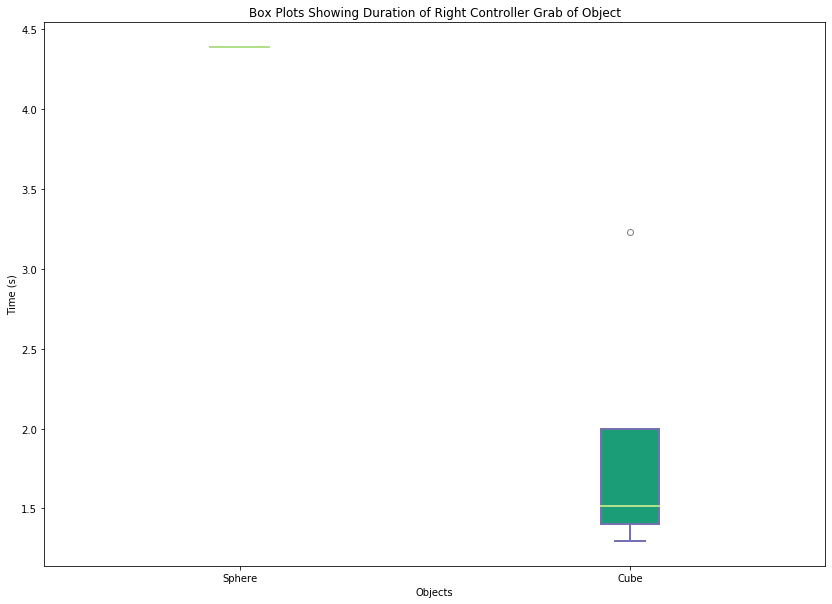

In [19]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Right Controller Grab of Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

### Both Controllers Grab

#### Both Controllers Grab Dictionaries

In [20]:
# Both Controllers
left_controller_grab_data = controller_data["PrimaryHandTrigger"]
right_controller_grab_data = controller_data["SecondaryHandTrigger"]

# These variables are for Bar Graphs
total_length_of_time = {}
total_count = {}
average_look_time = {}
longest_look_time = {}

# These variables are for Box Plots
all_look_times = {}

for i in range(0, len(right_controller_grab_data)):
    if left_controller_grab_data[i] == 1 or right_controller_grab_data[i] == 1:
        obj = objects[i]
        obj_interaction_time = inter_end[i] - inter_init[i]
        
        # Fill out the all_look_times with all look times
        if obj in all_look_times.keys():
            all_look_times[obj].append(obj_interaction_time)
        else:
            all_look_times_list = [obj_interaction_time]
            all_look_times[obj] = all_look_times_list
        
        # Fill out the total_length_of_time dictionary
        if obj in total_length_of_time.keys():
            total_length_of_time[obj] += obj_interaction_time
        else:
            total_length_of_time[obj] = obj_interaction_time
            
        # Fill out the total_count dictionary
        if obj in total_count.keys():
            total_count[obj] += 1
        else:
            total_count[obj] = 1
            
        # Maybe update the longest_look_time
        if obj in longest_look_time.keys():
            if longest_look_time[obj] < obj_interaction_time:
                longest_look_time[obj] = obj_interaction_time
        else:
            longest_look_time[obj] = obj_interaction_time
            
for obj_key in total_length_of_time.keys():
    average_look_time[obj_key] = total_length_of_time[obj_key] / total_count[obj_key]
    
# Debugging
print(total_length_of_time)
print(total_count)
print(average_look_time)
print(longest_look_time)

{'Sphere': 6.574590000000004, 'Cube': 14.128670000000014}
{'Sphere': 2, 'Cube': 8}
{'Sphere': 3.287295000000002, 'Cube': 1.7660837500000017}
{'Sphere': 4.387429999999998, 'Cube': 3.226529999999997}


#### Both Controllers Grab Bar Graphs

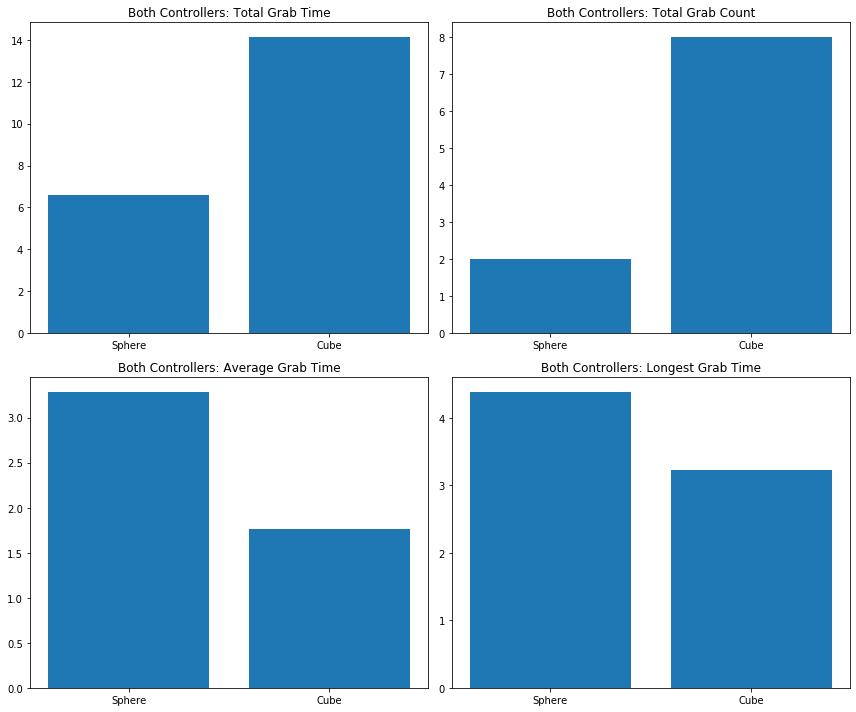

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0
num_plots = 4

label = total_count.keys()
indices = range(0, len(label))

for i in range(0, num_plots):
    if i == 0:
        data = total_length_of_time.values()
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_title("Both Controllers: Total Grab Time")
        
    elif i == 1:
        data = total_count.values()
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_title("Both Controllers: Total Grab Count")
        
    elif i == 2:
        data = average_look_time.values()
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_title("Both Controllers: Average Grab Time")
        
    else:
        data = longest_look_time.values()
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_title("Both Controllers: Longest Grab Time")

fig.tight_layout()

# Display box plot

#### Both Controllers Grab Box Plots

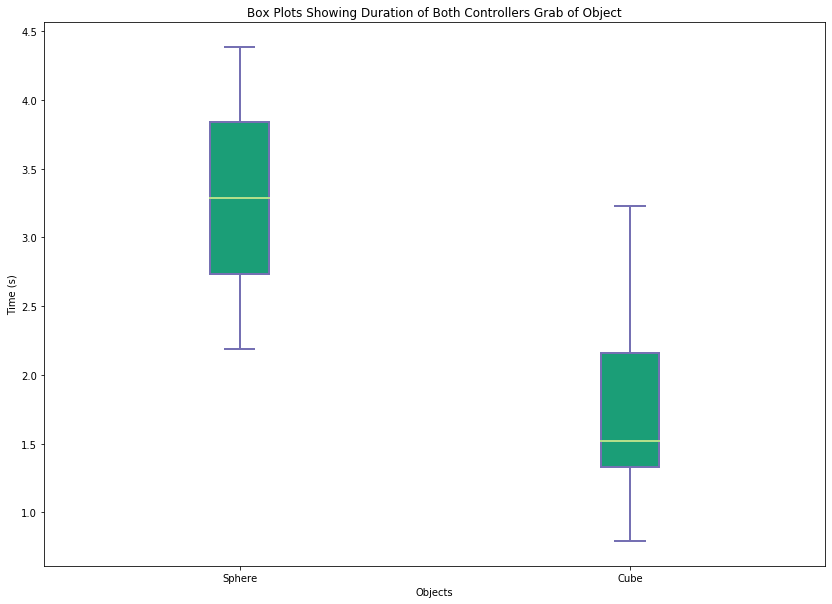

In [22]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Both Controllers Grab of Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

## ----------------------------------------------------------------------------------------------------------------------------------

## Gaze Data

In [23]:
gaze_data = pd.read_csv("test123_Gaze.csv")

In [24]:
gaze_data

,ID,ObjectName,Start,End
0,test123,Sphere,15.89489,16.28501
1,test123,Sphere,16.32919,33.37849
2,test123,Capsule,34.81036,36.19427
3,test123,Sphere,36.85122,37.49286
4,test123,Cube,39.22190,42.89067
5,test123,Cube,43.39563,45.68243
6,test123,Cube,45.77342,52.74668
7,test123,Cube,53.26842,53.74845
8,test123,Cube,54.79508,59.43029
9,test123,Cube,60.37891,63.80872


#### Create a dictionary that holds object name and start and end time as tuples

In [25]:
ID = gaze_data["ID"][0]
objects = gaze_data["ObjectName"]
start_times = gaze_data["Start"]
end_times = gaze_data["End"]
gaze_data_time_map = {}

for idx in range(0, len(objects)):
    if objects[idx] not in gaze_data_time_map.keys():
        new_list = []
        new_list.append((start_times[idx], end_times[idx]))
        gaze_data_time_map[objects[idx]] = new_list
    else:
        gaze_data_time_map[objects[idx]].append((start_times[idx], end_times[idx]))
        

print(gaze_data_time_map)

{'Sphere': [(15.89489, 16.28501), (16.32919, 33.37849), (36.85122, 37.49286), (72.24387, 72.28371)], 'Capsule': [(34.810359999999996, 36.19427)], 'Cube': [(39.2219, 42.89067), (43.39563, 45.68243), (45.77342, 52.746680000000005), (53.26841999999999, 53.74845), (54.795080000000006, 59.43029), (60.37891, 63.808719999999994), (67.34172, 69.10825), (69.36417, 72.20689), (72.28371, 76.43632), (76.50022, 76.57398), (76.64401, 76.74417), (76.77264, 76.88521999999999), (78.26174, 78.48185)], 'Cylinder': [(64.3383, 67.04089)]}


#### Create a dictionary with all data neately parsed

In [26]:
# Find appropriate statistical measures and display results

parsed_data_map = {}

# All statistics we are measuring for bar graphs
object_list = []
total_time_list = []
look_at_count_list = []
avg_time_list = []
longest_time_list = []

# Dictionary for box plots
all_look_times = {}

for k, v in gaze_data_time_map.items():
    # Find the name of the object we are dealing with
    object_name = k
    object_list.append(object_name)
    
     # Fill out the all_look_times with all look times
    for start_end in v:
        gaze_time = start_end[1] - start_end[0]
        if object_name in all_look_times.keys():
            all_look_times[object_name].append(gaze_time)
        else:
            all_look_times_list = [gaze_time]
            all_look_times[object_name] = all_look_times_list

    # Calculate the total length of time the subject looked at the object.
    total_time = 0
    for start_end in v:
        total_time += (start_end[1] - start_end[0])
    total_time_list.append(total_time)
    
    # Calculate the total number of times the subject looked at the object.
    look_at_count = len(v)
    look_at_count_list.append(look_at_count)
    
    # Calculate the average length of time the subject looked at the object.
    avg_time = total_time / look_at_count
    avg_time_list.append(avg_time)
    
    # Calculate the longest fixation period of time
    stare_lengths = []
    for start_end in v:
        stare_lengths.append(start_end[1] - start_end[0])

    longest_fixation = max(stare_lengths)
    longest_time_list.append(longest_fixation)

# Create the "MASTER LIST". Key will be used as the y-axis label for plots.
parsed_data_map["Name of Object"] = object_list
parsed_data_map["Total Look Time (s)"] = total_time_list
parsed_data_map["Total Look Count"] = look_at_count_list
parsed_data_map["Average Look Time (s)"] = avg_time_list
parsed_data_map["Longest Look Time (s)"] = longest_time_list
    
# Debugging
print(all_look_times)
print(parsed_data_map)

{'Sphere': [0.3901199999999996, 17.0493, 0.6416400000000024, 0.0398399999999981], 'Capsule': [1.3839100000000073], 'Cube': [3.668770000000002, 2.2867999999999995, 6.973260000000003, 0.4800300000000064, 4.635209999999994, 3.4298099999999963, 1.766530000000003, 2.84272, 4.152609999999996, 0.07376000000000715, 0.10016000000000247, 0.11257999999999413, 0.22010999999999115], 'Cylinder': [2.7025900000000007]}
{'Name of Object': ['Sphere', 'Capsule', 'Cube', 'Cylinder'], 'Total Look Time (s)': [18.1209, 1.3839100000000073, 30.742349999999995, 2.7025900000000007], 'Total Look Count': [4, 1, 13, 1], 'Average Look Time (s)': [4.530225, 1.3839100000000073, 2.3647961538461533, 2.7025900000000007], 'Longest Look Time (s)': [17.0493, 1.3839100000000073, 6.973260000000003, 2.7025900000000007]}


#### Gaze Bar Graphs

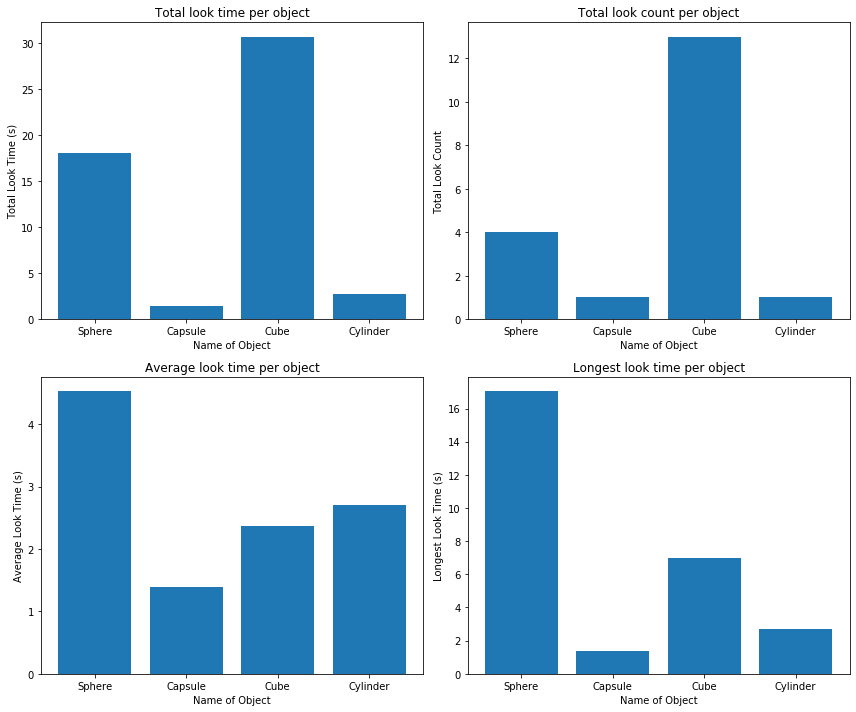

In [27]:
# Graph the results
keys = list(parsed_data_map)
label = parsed_data_map[keys[0]]
indices = range(len(label))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0

for i in range(1, len(keys)):
    data = parsed_data_map[keys[i]]
    
    if i == 1:
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_xlabel(keys[0], fontsize=10)
        axes[0, 0].set_ylabel(keys[i], fontsize=10)
        axes[0, 0].set_title("Total look time per object")
        
    elif i == 2:
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_xlabel(keys[0], fontsize=10)
        axes[0, 1].set_ylabel(keys[i], fontsize=10)
        axes[0, 1].set_title("Total look count per object")
        
    elif i == 3:
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_xlabel(keys[0], fontsize=10)
        axes[1, 0].set_ylabel(keys[i], fontsize=10)
        axes[1, 0].set_title("Average look time per object")
        
    else:
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_xlabel(keys[0], fontsize=10)
        axes[1, 1].set_ylabel(keys[i], fontsize=10)
        axes[1, 1].set_title("Longest look time per object")

fig.tight_layout()

#### Gaze Box Plots

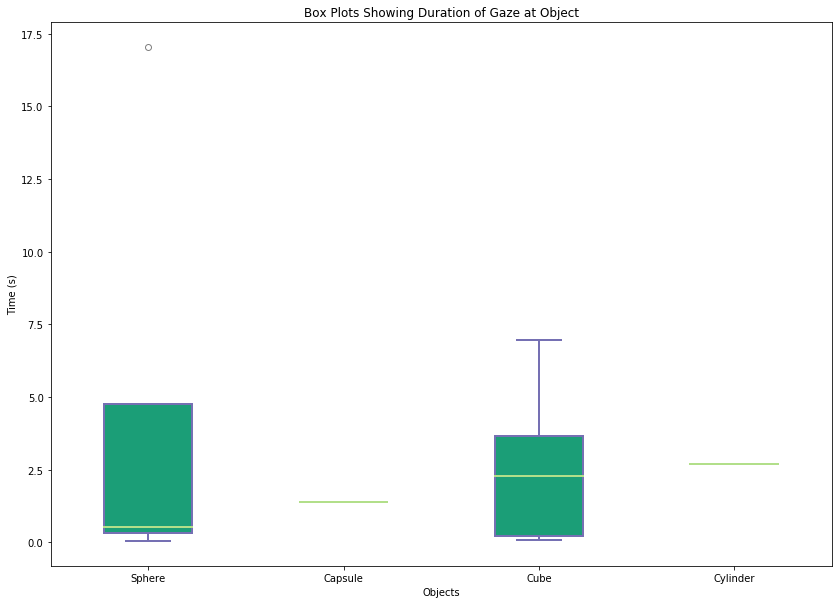

In [28]:
# Box Plot
fig = plt.figure(1, figsize=(14, 10))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() to get fill color
bp = ax.boxplot(list(all_look_times.values()), patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_title("Box Plots Showing Duration of Gaze at Object")
ax.set_xlabel("Objects")
ax.set_ylabel("Time (s)")
ax.set_xticklabels(list(all_look_times.keys()))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

## ----------------------------------------------------------------------------------------------------------------------------------

## Player Position Data

In [29]:
player_position_data = pd.read_csv("test123_PlayerPosition.csv")

In [30]:
player_position_data

,UserID,Time,XPos,ZPos
0,test123,9.280869,-0.000008,0.000008
1,test123,9.493715,-0.000008,0.000008
2,test123,9.720088,-0.000009,0.000009
3,test123,9.938070,1.681577,1.620906
4,test123,10.158430,1.681577,1.620906
...,...,...,...,...
326,test123,80.828480,0.315295,-0.149354
327,test123,81.073530,0.315295,-0.149354
328,test123,81.320400,0.315295,-0.149354
329,test123,81.562520,0.315295,-0.149354


Text(0.5, 1, 'User Heatmap')

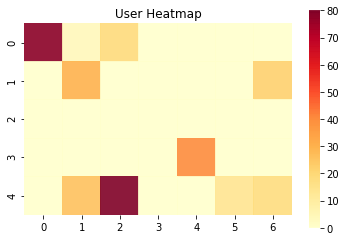

In [31]:
# Get all x and z positions.
xPos = player_position_data["XPos"].to_numpy()
zPos = player_position_data["ZPos"].to_numpy()

# Find max and min X and Z values.
maxX = max(xPos)
minX = min(xPos)
maxZ = max(zPos)
minZ = min(zPos)

# Convert floor to int using floor or ceil.
if maxX < 0:
    maxX = math.floor(maxX)
else:
    maxX = math.ceil(maxX)

if minX < 0:
    minX = math.floor(minX)
else:
    minX = math.ceil(minX)
    
if maxZ < 0:
    maxZ = math.floor(maxZ)
else:
    maxZ = math.ceil(maxZ)
    
if minZ < 0:
    minZ = math.floor(minZ)
else:
    minZ = math.ceil(minZ)

# Debugging
# print(maxX)
# print(minX)
# print(maxZ)
# print(minZ)

pos = [list(a) for a in zip(xPos, zPos)]
posMap = [[0 for i in range((maxZ-minZ))] for j in range((maxX-minX))]

for i in range(len(pos)):
    posMap[int(pos[i][0])][int(pos[i][1])] += 1

hmap = sns.heatmap(posMap, vmin=np.min(posMap), vmax=np.max(posMap), cmap = "YlOrRd", alpha = 0.9, zorder = 2, square = True)
plt.title('User Heatmap')

# Make time series

## End of File